# Experiment result:

## crop on crop
| size| 0      | 25     | 33     | 50     | 66     | 80     | 100     |     
|-|
| 0   | 0.9213 | 0.8995 | 0.8865 | 0.8131 | 0.6194 | 0.3046 | 0.0468 | 
| 25  | 0.9179 | 0.9100 | 0.9012 | 0.8534 | 0.7036 | 0.3740 | 0.0468 | 
| 33  | 0.9205 | 0.9108 | 0.9023 | 0.8619 | 0.7176 | 0.3914 | 0.0468 | 
| 50  | 0.9154 | 0.9071 | 0.8998 | 0.8748 | 0.7882 | 0.5289 | 0.0468 | 
| 66  | 0.8950 | 0.8861 | 0.8815 | 0.8600 | 0.8040 | 0.6670 | 0.0468 | 
| 80  | 0.8440 | 0.8347 | 0.8291 | 0.8117 | 0.7662 | 0.6575 | 0.0468 | 
| all | 0.9150 | 0.9070 | 0.8994 | 0.8676 | 0.7971 | 0.6578 | 0.0595 | 

## nocrop on nocrop

## crop on nocrop

## nocrop on crop

## nocrop:

| area | 0 | 11 | 25 | 44 | 100 |
|-------------------|--------|--------|---------|-----|-------|
| pre-trained |0.7025 | 0.5867 | 0.4272 | 0.2589 | 0.0385 | 
| fine_tune_0    |0.9395 | 0.8990 | 0.8261 | 0.7079 | 0.2460 | 
| fine_tune_11   |0.9340 | 0.9158 | 0.8755 | 0.7874 | 0.2855 | 
| fine_tune_25   |0.9305 | 0.9142 | 0.8845 | 0.8245 | 0.3335 | 
| fine_tune_44   |0.9240 | 0.9063 | 0.8786 | 0.8357 | 0.3775 | 
| fine_tune_all   |0.9335 | 0.9146 | 0.8838 | 0.8296 | 0.4460 | 

accuracy_aperture_aperture_0.pickle
accuracy_aperture_aperture_10.pickle
accuracy_aperture_aperture_20.pickle
accuracy_aperture_aperture_30.pickle
accuracy_aperture_aperture_40.pickle
accuracy_aperture_aperture_50.pickle
accuracy_aperture_aperture_60.pickle
accuracy_aperture_aperture_70.pickle
accuracy_aperture_aperture_80.pickle
accuracy_aperture_aperture_90.pickle
accuracy_aperture_aperture_100.pickle
accuracy_aperture_aperture_all.pickle


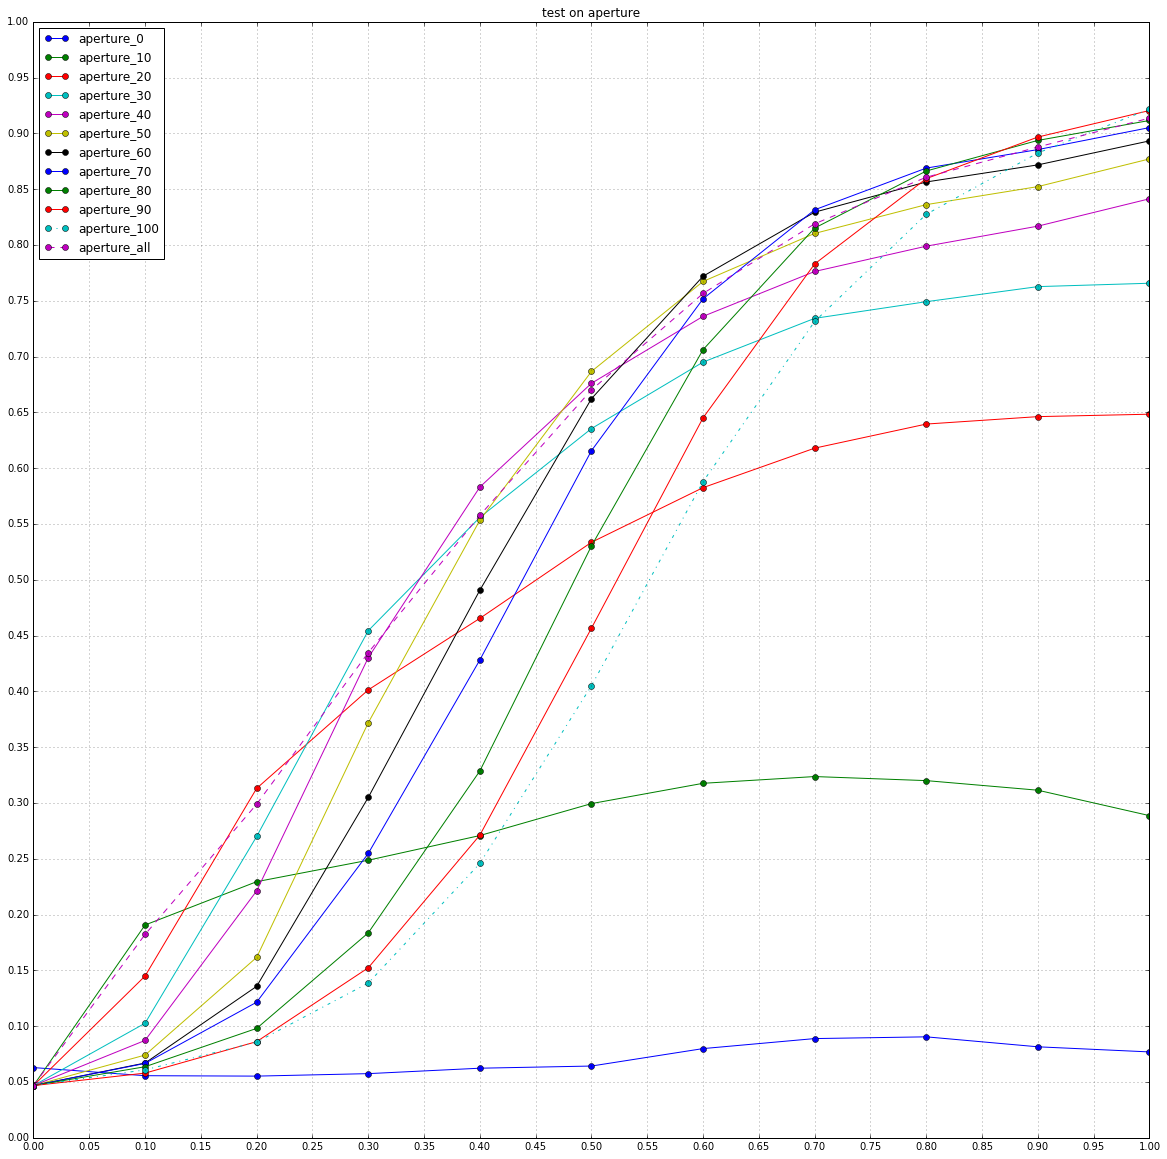

"\nfor i, accuracy in enumerate(accuracies):\n    sys.stdout.write('| {} | '.format(net_names[i]))\n    for x in accuracy:\n        sys.stdout.write('{:.4f} | '.format(x))\n    sys.stdout.write('\n')\n"

In [18]:
# Test result visualization.
from constant import *
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
import cPickle
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 20)

'''
net_names = ['0', '25', '33', '50', '66', '80', '90', 'all']
test_size = [0.0, 1.0/4, 1.0/3, 1.0/2, 2.0/3, 4.0/5, 9.0/10, 1.0]
model_strs = ['crop', 'nocrop']
test_strs = ['crop', 'nocrop']
'''

net_names = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', 'all']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
model_strs = ['aperture']
test_strs = ['aperture']
    
test_size_sq = [i * i for i in test_size]
for test_str in test_strs:
    for model_str in model_strs:
        # Grid.
        ax = plt.gca()
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.set_xticks(np.arange(0, 1.05, 0.05))                                                       
        ax.set_xticks(np.arange(0, 1.05, 0.05), minor=True)                                           
        ax.set_yticks(np.arange(0, 1.05, 0.05))                                                       
        ax.set_yticks(np.arange(0, 1.05, 0.05), minor=True)                                           
        ax.grid(which='both')                                                            
        ax.grid(which='minor', alpha=0.2)                                                
        ax.grid(which='major', alpha=0.5)   
        plt.title('test on {}'.format(test_str))
        for net_name in net_names:
            with open('{}test/accuracy_{}_{}_{}.pickle'.format(result_root, model_str, test_str, net_name)) as f:
                print 'accuracy_{}_{}_{}.pickle'.format(model_str, test_str, net_name)
                accuracy = cPickle.load(f)
            if len(model_strs) == 2:
                if model_str == 'crop':
                    plt.plot(test_size, accuracy, marker = 'o', linestyle = '-')
                else:
                    plt.plot(test_size, accuracy, marker = 'o', linestyle = '--')
            if len(model_strs) == 1:
                if net_name == 'all':
                    plt.plot(test_size, accuracy, marker = 'o', linestyle = '--')
                elif net_name == '100':
                    plt.plot(test_size, accuracy, marker = 'o', linestyle = '-.')
                else:
                    plt.plot(test_size, accuracy, marker = 'o', linestyle = '-')
        if len(model_strs) == 2:
            plt.legend([model_str[0] + '_' + net_name for net_name in net_names] \
                      +[model_str[1] + '_' + net_name for net_name in net_names], loc='upper right')
        if len(model_strs) == 1:
            plt.legend([model_str + '_' + net_name for net_name in net_names], loc='upper left')
        plt.show()
    
if len(model_strs) == 2:
    for test_str in test_strs:
        # Grid.
        ax = plt.gca()
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.set_xticks(np.arange(0, 1.05, 0.05))                                                       
        ax.set_xticks(np.arange(0, 1.05, 0.05), minor=True)                                           
        ax.set_yticks(np.arange(0, 1.05, 0.05))                                                       
        ax.set_yticks(np.arange(0, 1.05, 0.05), minor=True)                                           
        ax.grid(which='both')                                                            
        ax.grid(which='minor', alpha=0.2)                                                
        ax.grid(which='major', alpha=0.5)   
        plt.title('test on {}'.format(test_str))
        for model_str in model_strs:
            for net_name in net_names:
                with open('{}test/accuracy_{}_{}_{}.pickle'.format(result_root, model_str, test_str, net_name)) as f:
                    accuracy = cPickle.load(f)
                if model_str == 'crop':
                    plt.plot(test_size, accuracy, marker = 'o', linestyle = '-')
                else:
                    plt.plot(test_size, accuracy, marker = 'o', linestyle = '--')
        plt.legend([model_str[0] + net_name for net_name in net_names] + \
                   [model_str[1] + net_name for net_name in net_names], loc='upper right')
        plt.show()
    
'''
for i, accuracy in enumerate(accuracies):
    sys.stdout.write('| {} | '.format(net_names[i]))
    for x in accuracy:
        sys.stdout.write('{:.4f} | '.format(x))
    sys.stdout.write('\n')
'''

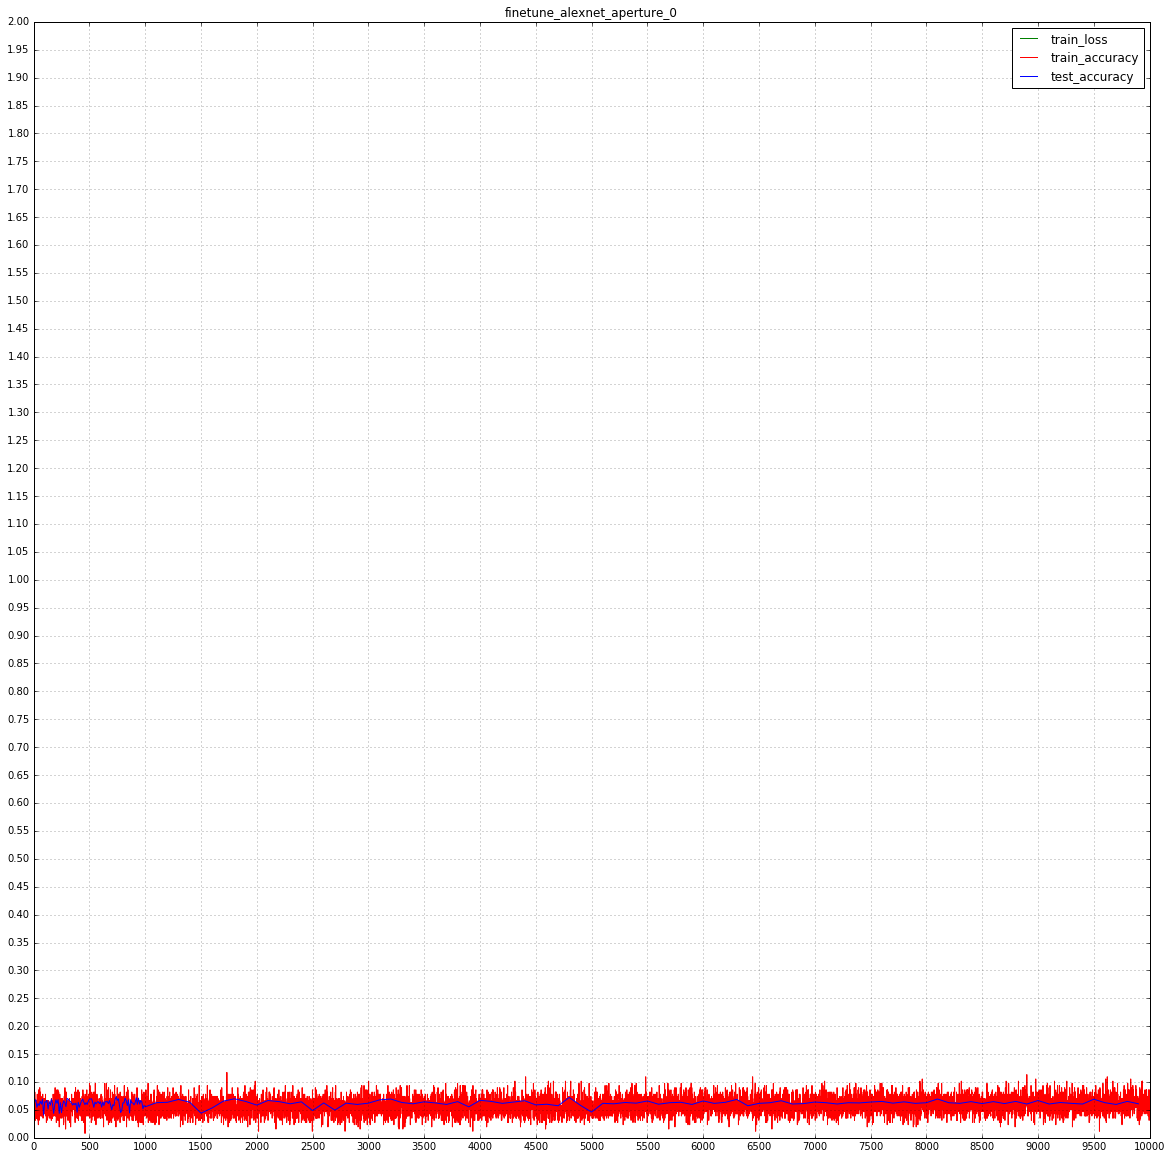

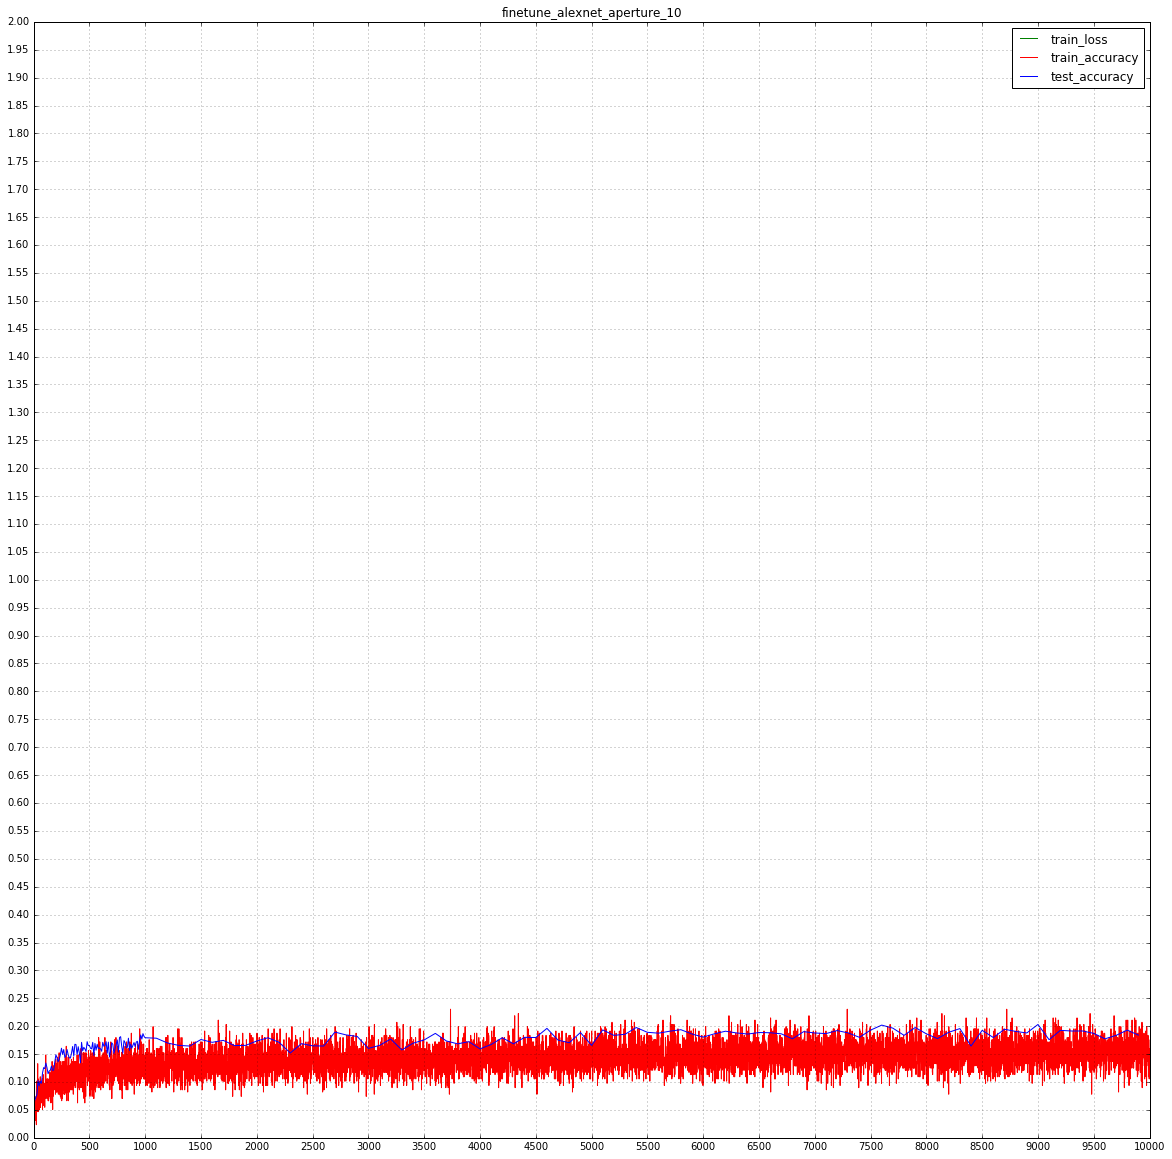

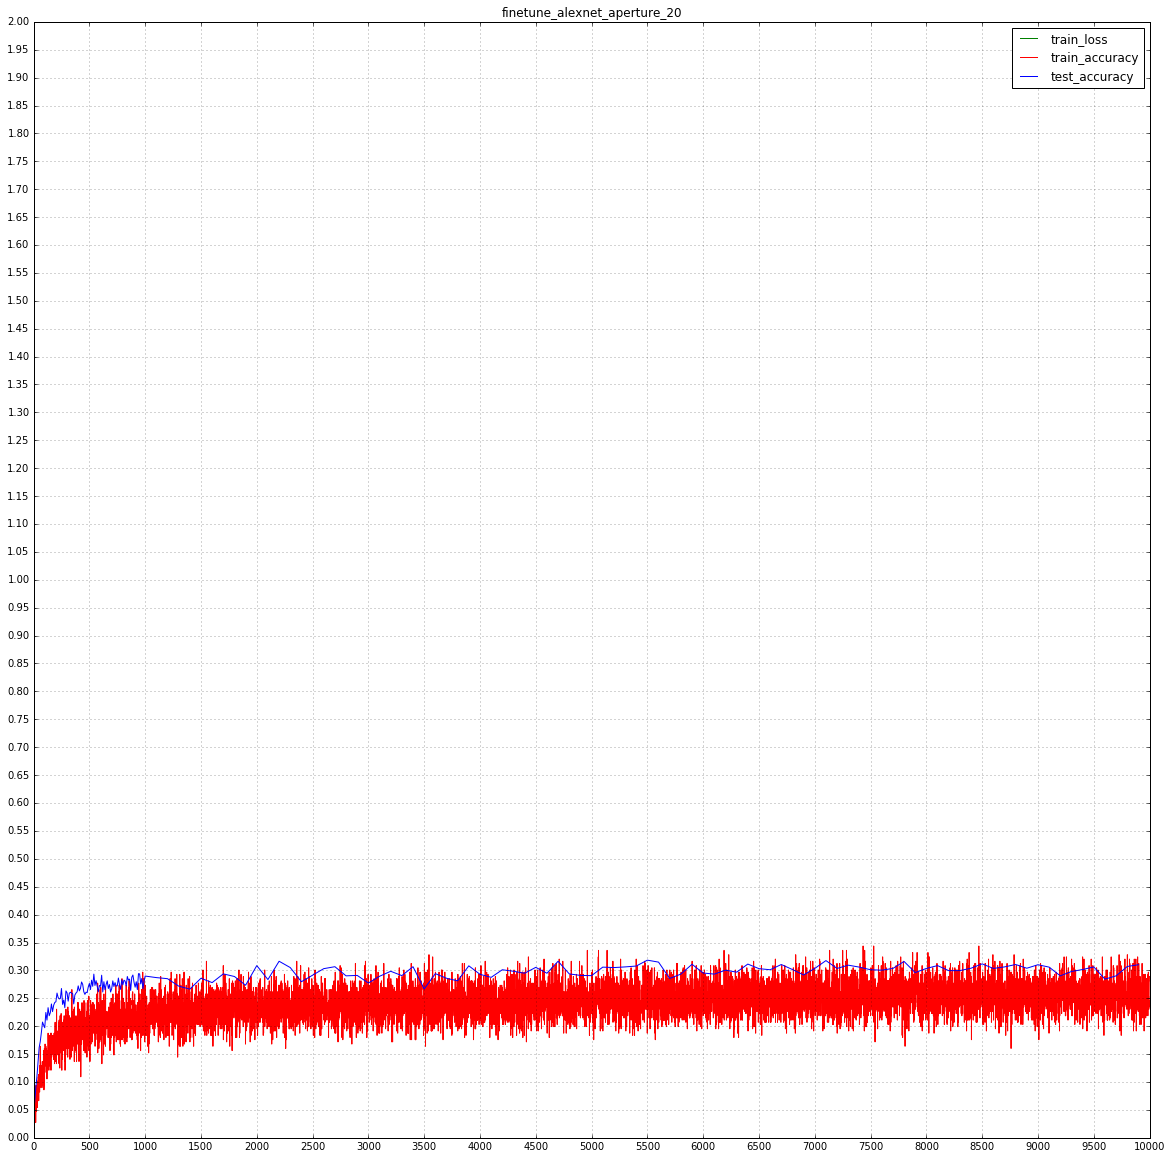

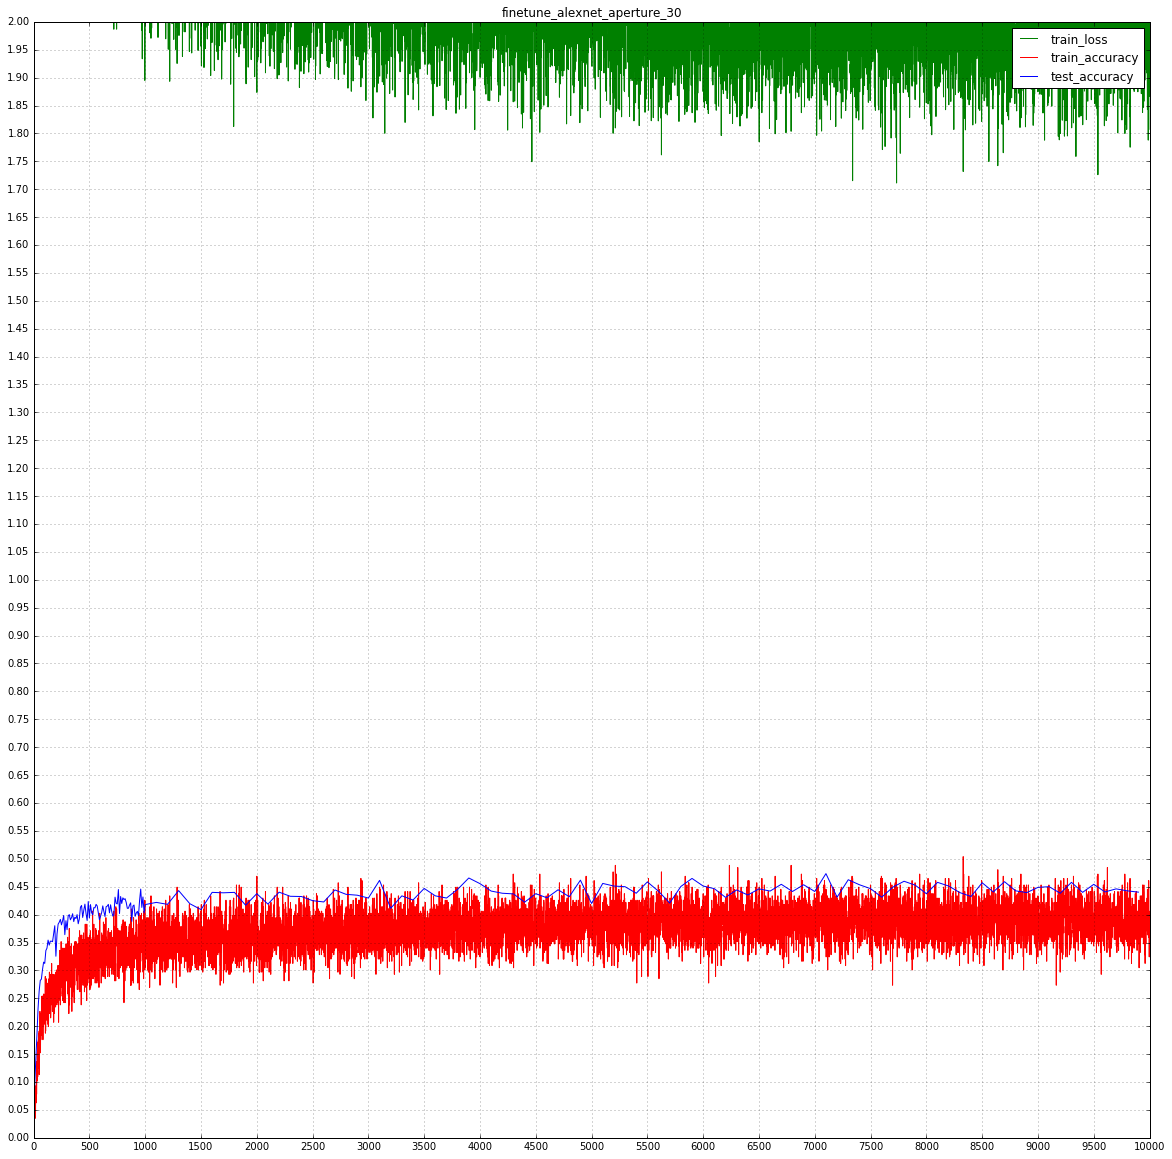

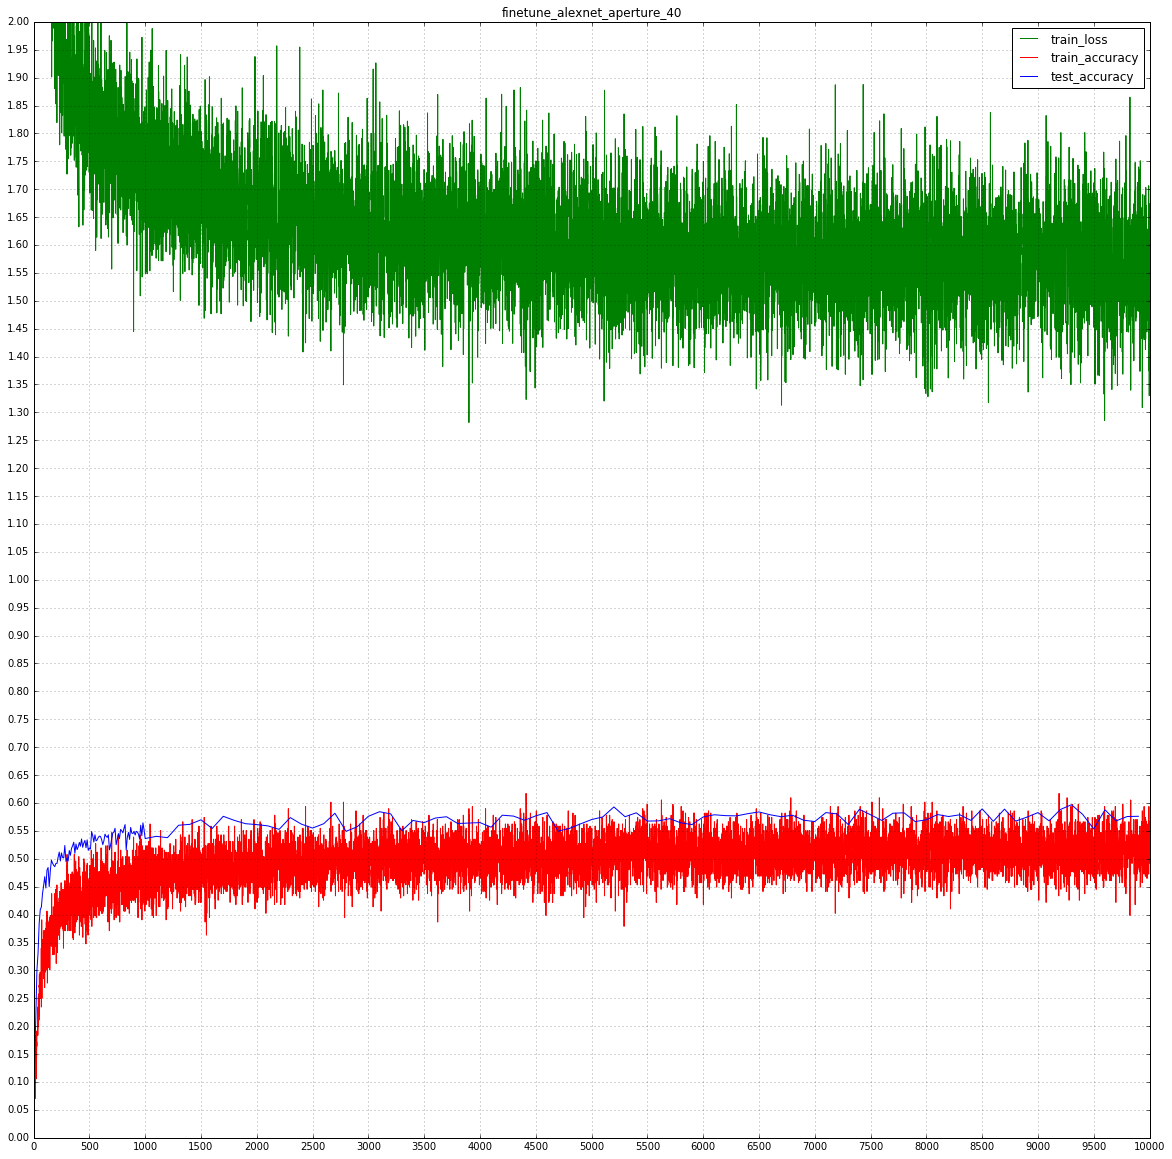

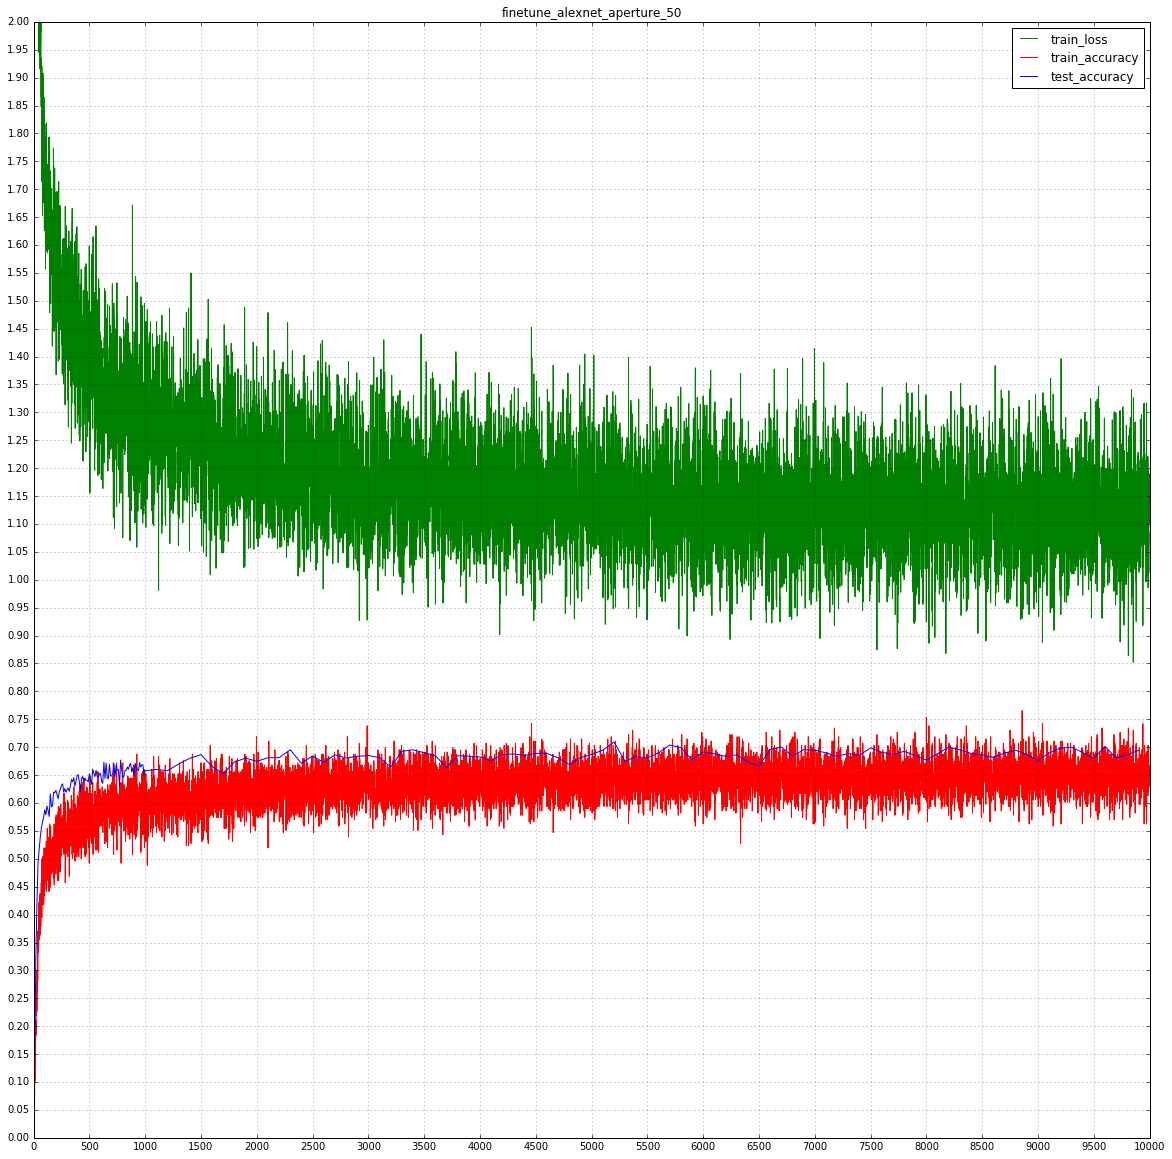

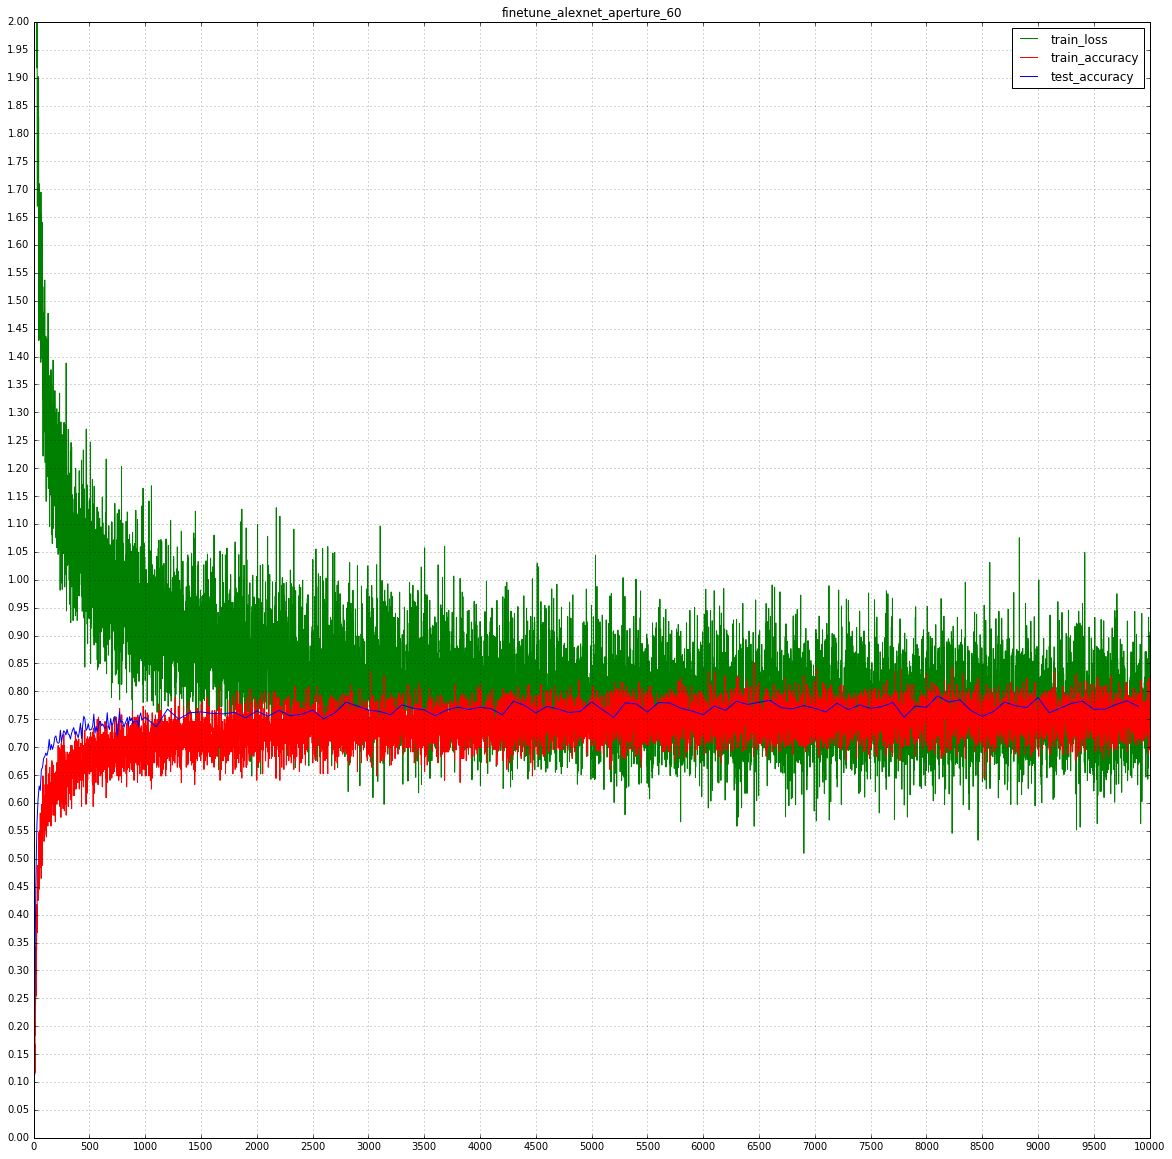

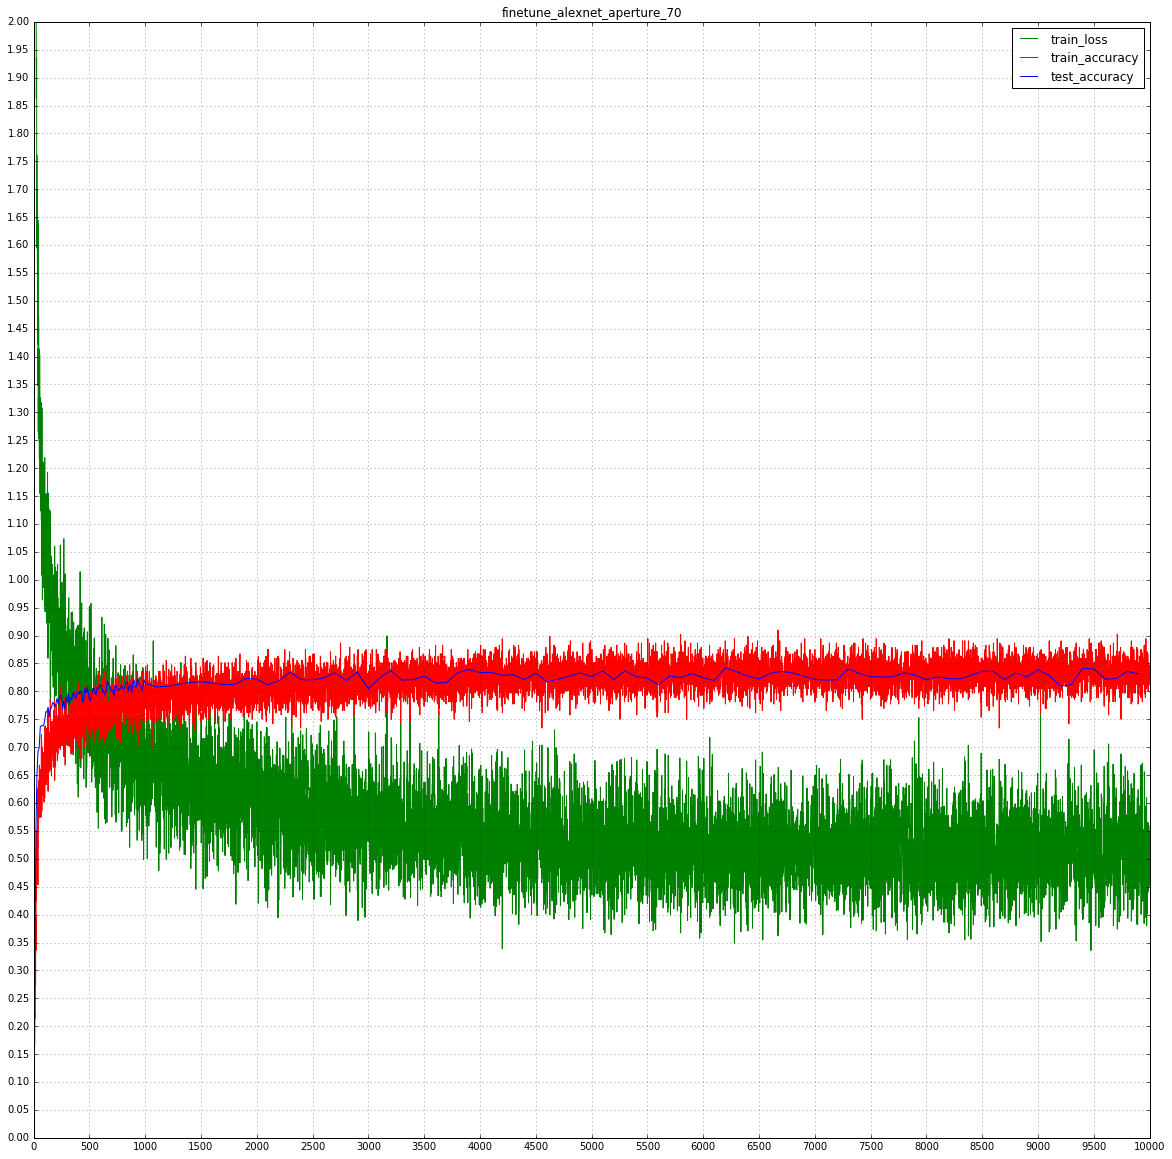

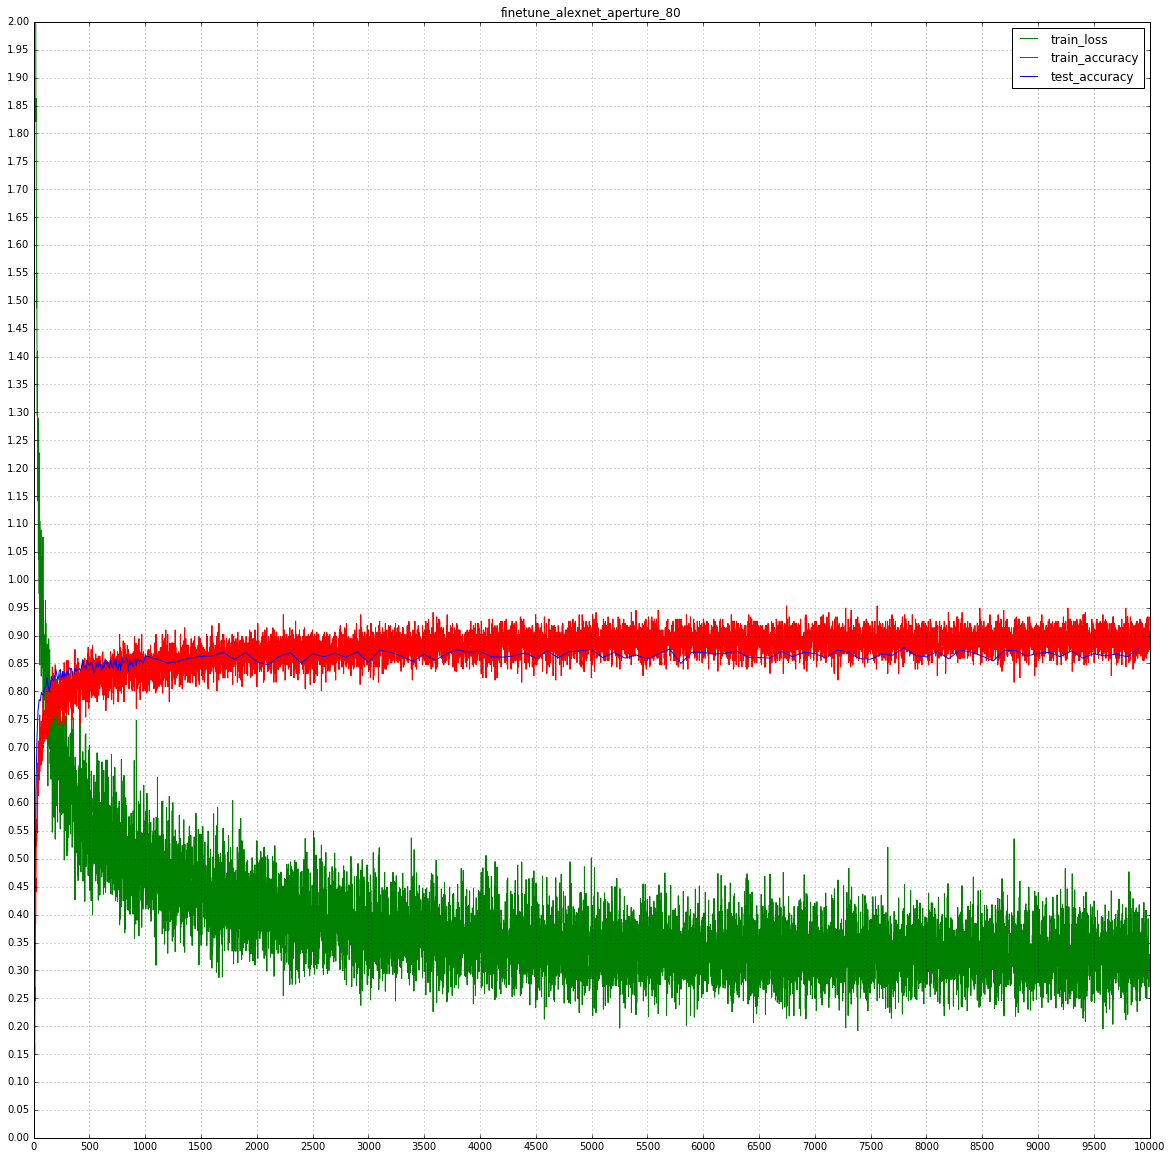

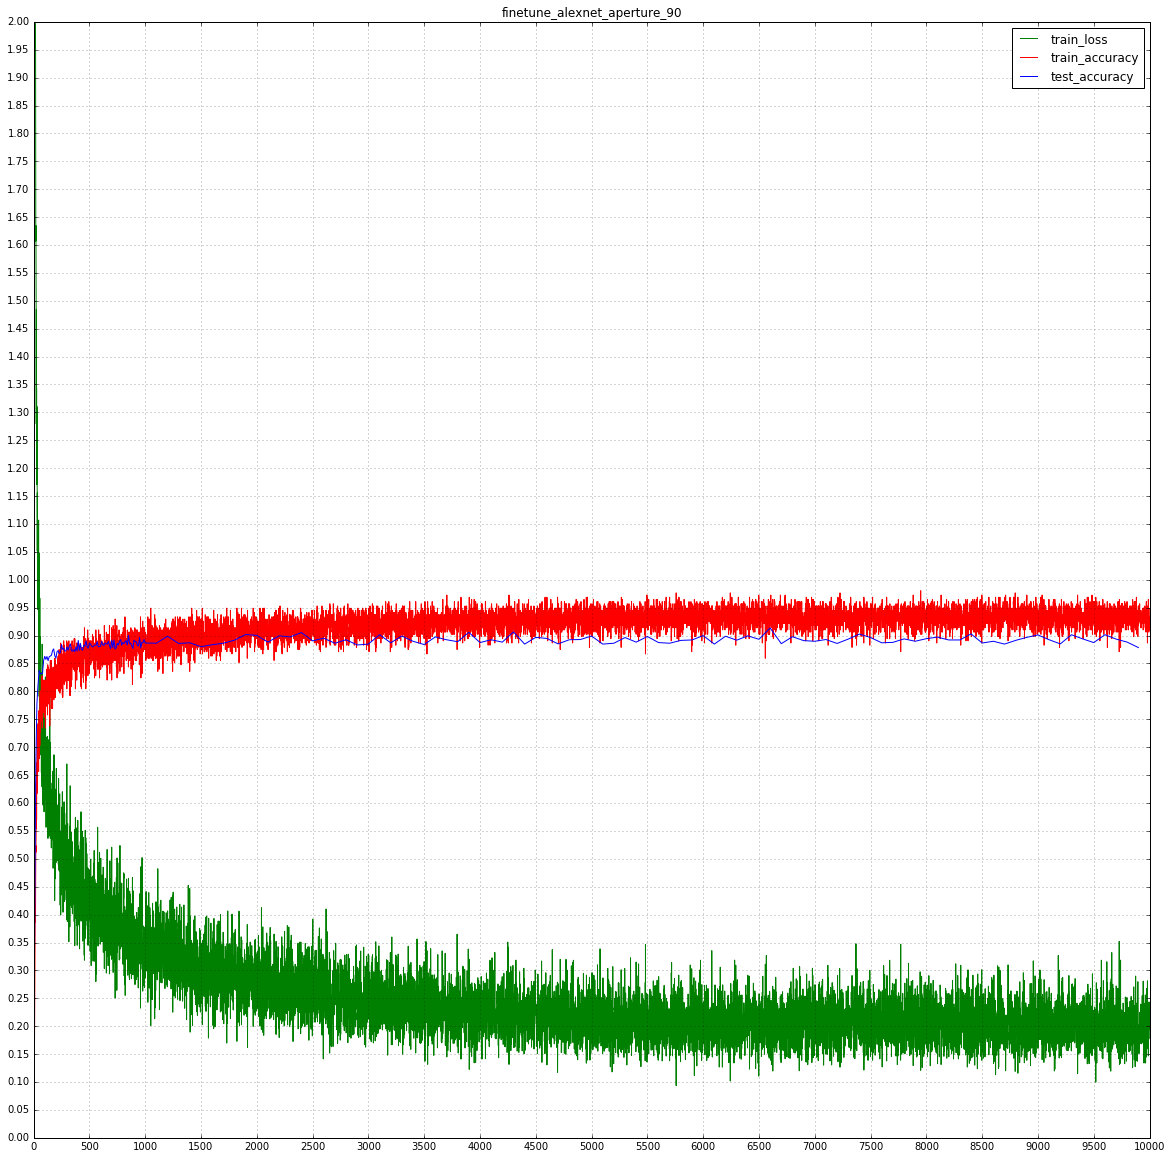

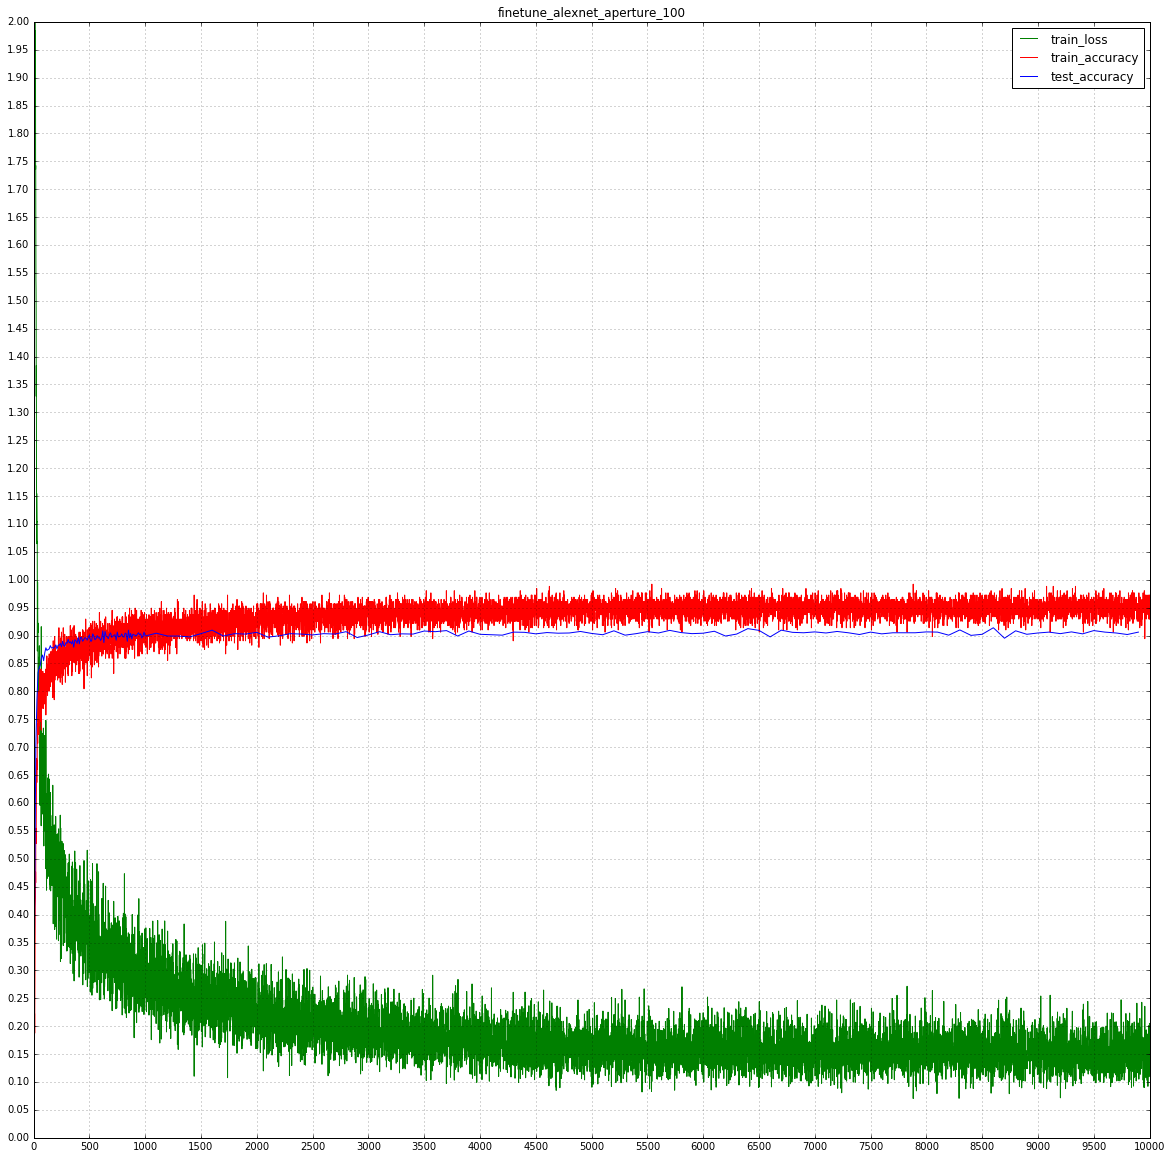

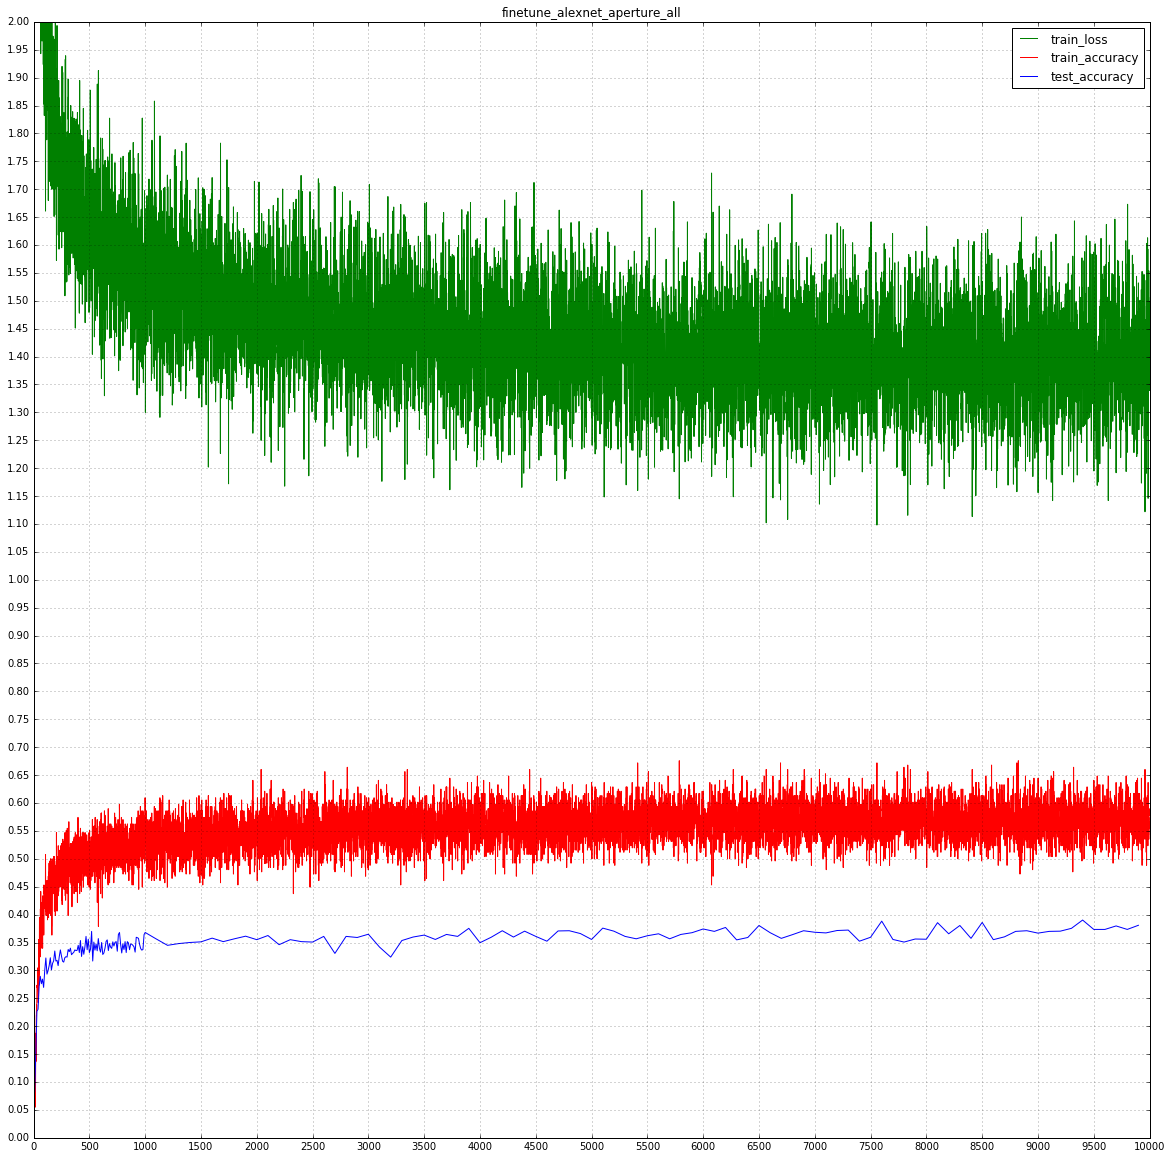

In [13]:
# Fine tuning visualization.
from constant import *
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
import cPickle
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 20)

net_names = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', 'all']
type_strs = ['aperture']

#net_names = ['0', '25', '33', '50', '66', '80', '90', 'all']
#type_strs = ['crop', 'nocrop']

for type_str in type_strs:
    for net_name in net_names:
        with open('{}finetune/train_loss_{}_{}.pickle'.format(result_root, type_str, net_name)) as f:
            train_loss = cPickle.load(f)
        with open('{}finetune/train_accuracy_{}_{}.pickle'.format(result_root, type_str, net_name)) as f:
            train_accuracy = cPickle.load(f)
        with open('{}finetune/test_accuracy_{}_{}.pickle'.format(result_root, type_str, net_name)) as f:
            test_accuracy = cPickle.load(f)

        
        # Title.
        plt.title('finetune_alexnet_{}_{}'.format(type_str, net_name))

        # Curves.
        plt.plot(train_loss, zorder = 0, color = 'g')
        plt.plot(train_accuracy, zorder = 1, color = 'r')
        keys = sorted(test_accuracy.keys())
        values = [test_accuracy[key] for key in keys]
        plt.plot(keys, values, zorder = 2, color = 'b')
        plt.legend(['train_loss', 'train_accuracy', 'test_accuracy'], loc='upper right')

        # Grid.
        ax = plt.gca()
        ax.set_xlim([0, 10000])
        ax.set_ylim([0, 2])
        ax.set_xticks(np.arange(0, 10500, 500))                                                       
        ax.set_xticks(np.arange(0, 10500, 500), minor=True)                                           
        ax.set_yticks(np.arange(0, 2.05, 0.05))                                                       
        ax.set_yticks(np.arange(0, 2.05, 0.05), minor=True)                                           
        ax.grid(which='both')                                                            
        ax.grid(which='minor', alpha=0.2)                                                
        ax.grid(which='major', alpha=0.5)     

        plt.show()